# Introducción a la visualización de datos con Python

In [5]:
import pandas as pd
import requests
from io import StringIO

# URL 
url = 'https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv'

# Lee la URL
response = requests.get(url)
US= pd.read_csv(StringIO(response.text))

# Muestra las primeras filas 
print(US.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

## 1. Número de medallas por deporte en 2016
Genere un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.

Instalamos en el ambiente la libreria matplotlib ejecutando el código en la consola: 
    
```PowerShell
     pip install matplotlib
 ```
    

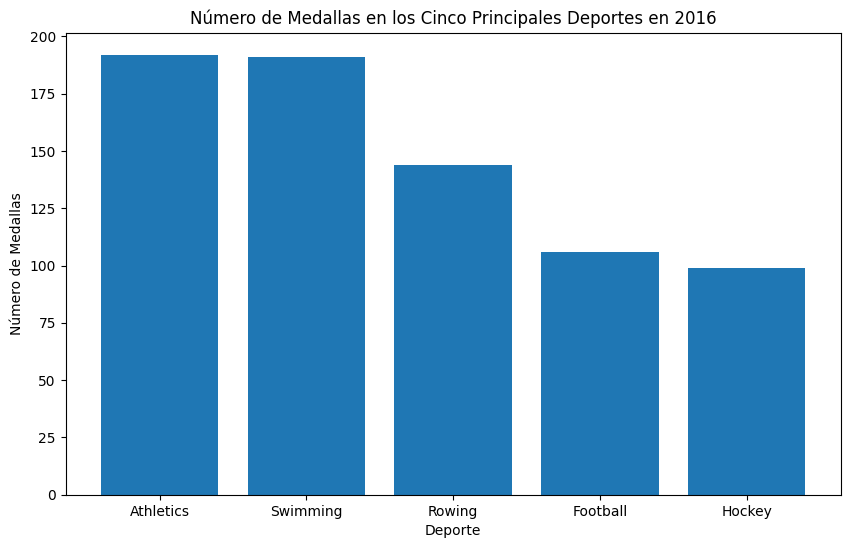

In [9]:
import matplotlib.pyplot as plt

# Filtrar 2016
US_2016 = US[US['Year'] == 2016]

# Agrupamos por deporte y vamos contando el número de medallas
medallas_por_deporte = US_2016.groupby('Sport')['Medal'].count().reset_index(name='Medallas')

# Ordenamos para los 5 primeroso
top5_deportes = medallas_por_deporte.sort_values(by='Medallas', ascending=False).head(5)

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(top5_deportes['Sport'], top5_deportes['Medallas'])
plt.title('Número de Medallas en los Cinco Principales Deportes en 2016')
plt.xlabel('Deporte')
plt.ylabel('Número de Medallas')
plt.show()


Se puede evidenciar en grafico el número de Medallas en los Cinco Principales Deportes en 2016, lo que deja ver que el deporte con más medallas es Athletics seguido de Swimming, superando las 175. En menor medida Football y Hockey

## 2. Ganadores de medallas deportivas en 2016: Distribución por edades

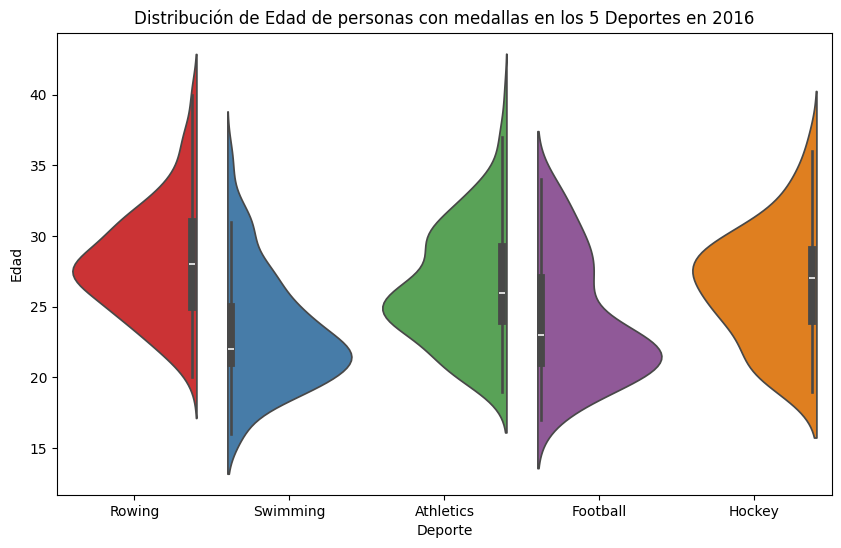

In [10]:
import seaborn as sns

# Filtramos según el año y las medallas
US_2016_medallas = US[(US['Year'] == 2016) & (~US['Medal'].isna())]

# Tomamos solo los 5 deportes con más medallas
top5_deportes = US_2016_medallas.groupby('Sport')['Medal'].count().reset_index(name='Medallas')
top5_deportes = top5_deportes.sort_values(by='Medallas', ascending=False).head(5)

# Filtramos para los 5 deportes principales
US_2016_top5 = US_2016_medallas[US_2016_medallas['Sport'].isin(top5_deportes['Sport'])]

# Gráfico 
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sport', y='Age', data=US_2016_top5, hue='Sport', palette='Set1', split=True)
plt.title('Distribución de Edad de personas con medallas en los 5 Deportes en 2016')
plt.xlabel('Deporte')
plt.ylabel('Edad')
plt.show()


La distribución de los datos podemos ver el comportamiento de la edad de los deportes. Podemos ver que hay unos deportes sesagados, como es el caso de Swimming, donde la mayoría de las personas tienen edades inferiores a los 25 años. Diferente al caso de Rowing, donde se evidencia una distribución más simetrica, donde la mayoría de personas pueden tener una edad en un rango de 20 a 38 años.

## 3. Ganadores de medallas deportivas en 2016: Distribución por euipos nacionales

In [11]:
# Filtramos para los 5 deportes
US_2016_top5 = US_2016_medallas[US_2016_medallas['Sport'].isin(top5_deportes['Sport'])]

# Agrupamos por país y deporte, y contamos el número de medallas
medallas_por_pais = US_2016_top5.groupby(['NOC', 'Sport']).size().reset_index(name='Total_Medallas')

# Encontramos el país con el mayor número de medallas en cada deporte
top_paises_por_deporte = medallas_por_pais.groupby('Sport').apply(lambda x: x.loc[x['Total_Medallas'].idxmax()]).reset_index(drop=True)

# Mostramos los resultados
print(top_paises_por_deporte)


   NOC      Sport  Total_Medallas
0  USA  Athletics              46
1  GER   Football              35
2  GER     Hockey              33
3  GBR     Rowing              26
4  USA   Swimming              71


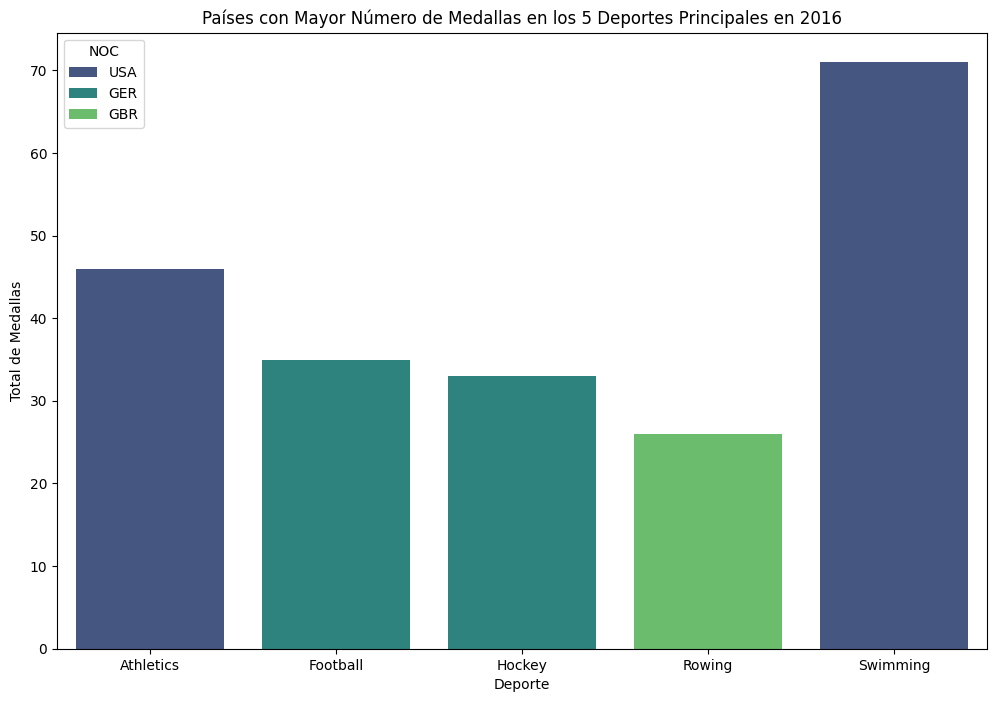

In [12]:
# Filtramos para los 5 deportes
US_2016_top5 = US_2016_medallas[US_2016_medallas['Sport'].isin(top5_deportes['Sport'])]

# Agrupamos por país y deporte entonces vamos contamos el número de medallas
medallas_por_pais = US_2016_top5.groupby(['NOC', 'Sport']).size().reset_index(name='Total_Medallas')

# Encontramos el país con el mayor número de medallas en cada deporte
top_paises_por_deporte = medallas_por_pais.groupby('Sport').apply(lambda x: x.loc[x['Total_Medallas'].idxmax()]).reset_index(drop=True)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Sport', y='Total_Medallas', hue='NOC', data=top_paises_por_deporte, palette='viridis')
plt.title('Países con Mayor Número de Medallas en los 5 Deportes Principales en 2016')
plt.xlabel('Deporte')
plt.ylabel('Total de Medallas')
plt.show()


Podemos evidenciar que el equipos nacional que más ganó medallas en los cinco principales deportes en 2016 es USA en el deporte Swimming con 71 medallas. Esto indica que USA representa un porcentaje significativo del total de medallas que se obtuvieron en esta categoría. Considerando que el total de medallas es 178.

## 4. Ganadores de medallas deportivas en 2016: Tendencias por peso y género

C:\Users\varga\AppData\Local\Temp\ipykernel_11392\68621788.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sport', y='Weight', hue='Sex', data=US_2016_top5, ci=None, dodge=True)


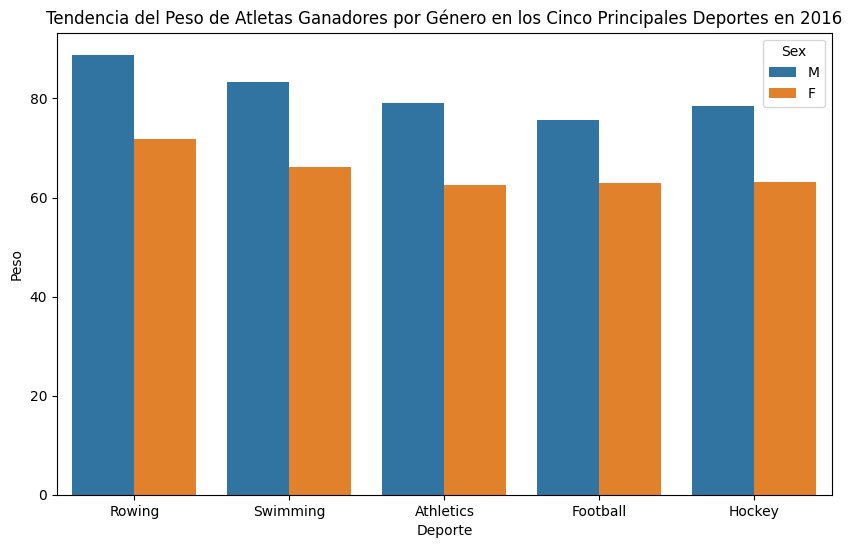

In [13]:
# Año 2016 y con medallas
US_2016_medallas = US[(US['Year'] == 2016) & (~US['Medal'].isna())]

# 5 deportes
top5_deportes = US_2016_medallas.groupby('Sport')['Medal'].count().reset_index(name='Medallas')
top5_deportes = top5_deportes.sort_values(by='Medallas', ascending=False).head(5)

# Nos quedamos con los datos para los cinco principales deportes
US_2016_top5 = US_2016_medallas[US_2016_medallas['Sport'].isin(top5_deportes['Sport'])]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Sport', y='Weight', hue='Sex', data=US_2016_top5, ci=None, dodge=True)
plt.title('Tendencia del Peso de Atletas Ganadores por Género en los Cinco Principales Deportes en 2016')
plt.xlabel('Deporte')
plt.ylabel('Peso')
plt.show()


Se evidencia que en estos 5 deportes estudiados predomina el genero masculino dobre el femenino. En Athletics deporte,Football y Hockey podemos ver que la cantidad de mujeres es igual, y que además es inferior a los otros dos desportes.

Por otro lado, podemos notar que Swimming y Athletics a pesar que tienen diferencias sobre la cantidad de personas tanto femeninas como masculinas, tienen un comportamiento muy parecido con el número de medallas obtenidas en estos deportes. Por lo que podriamos inferir acerca del rendimiento de las personas que se encuentran en dichos reportes. Esto igualmente sustentado el la distribución de la edades, ya que en el caso de Swimming la mediana se puede encontrar dentro del rango de [20,25] mientras que en Athletics se encuentra entre [25,30]. Asi, se pudiese pensar que a mayor edad menor rendimiento.